<a href="https://colab.research.google.com/github/akhils-codes1/ML4Crypto-2022/blob/main/jan4_ciphertexts_to_png.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from imageio import imread
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('round1vs3.csv')
df.describe()

,Unnamed: 0,class
count,3000.000000,3000.000000
mean,1499.500000,1.333333
std,866.169729,1.247427
min,0.000000,0.000000
25%,749.750000,0.000000
50%,1499.500000,1.000000
75%,2249.250000,3.000000
max,2999.000000,3.000000


In [ ]:
a = df.iloc[0]['text']
a

'ab0cd7aca15e4a7f6de4fef0d8001dc23fe9d2eba85e678332e14d9b967929aca3181d931f471f4069c3dd5a79ff4463a19710d94d0eb2e6799ff96d1671deb387bd5cf69c9ca2a011b24c2cff2086926fcc540c6fac618883c92d1febce761024ceb38e8f832f103adfeea17fd87cf1b20d762d37fbea1d93500fb2af7fcfb5394c650d0202b405af06762c9fd86281b1256a266765858e53e11b9da549c94bf03ce86209e8ea6f6ed6b9d9471c93334a473c1b1b00586d91386e6a6558e258d1497118e6bcfd6a82500cfd2a078d101794b29842db03bf6b09feb4aff3cf1d3a4747babc6244f20e261c296e8cfa7a560327c9c2e7a65b81a8dedb39c5c098420c2666933d4e43b9813c45b1af623ba31e9657d5995b48481f6233927a922e0b47579ca8debe07a4b208ef0a0287a80a8bbd14d5c07deab7b4d4e136df067827503439899eaa8f982a6ef60bd88dd8e7779d4056e44a45e477050b7b1c357f9c11524ce387ac9d41d1a02515e773cf9675fb1f20e3dfa1130269e0fe8cddd749d42642ca0607e7650937220738649fd7b83ce8189fe68ce1a4a36c79c35b45ad030826c6e9e509187faa7c577300b1b978db65b70e6bee4de04ff30a7328ff91f65032b836ad57d363d094b18250d2f298fce2c2cbce8fe9dbde98e82e43c736e3d56c8a5b5eabbd11950b8e37f7225438b57

In [ ]:
s = []
for i in a:
    s.append(str(ord(i)))
for i in range(25):
    s.append('254')
s = " ".join(s)
s = s+" "

In [ ]:
s

'97 98 48 99 100 55 97 99 97 49 53 101 52 97 55 102 54 100 101 52 102 101 102 48 100 56 48 48 49 100 99 50 51 102 101 57 100 50 101 98 97 56 53 101 54 55 56 51 51 50 101 49 52 100 57 98 57 54 55 57 50 57 97 99 97 51 49 56 49 100 57 51 49 102 52 55 49 102 52 48 54 57 99 51 100 100 53 97 55 57 102 102 52 52 54 51 97 49 57 55 49 48 100 57 52 100 48 101 98 50 101 54 55 57 57 102 102 57 54 100 49 54 55 49 100 101 98 51 56 55 98 100 53 99 102 54 57 99 57 99 97 50 97 48 49 49 98 50 52 99 50 99 102 102 50 48 56 54 57 50 54 102 99 99 53 52 48 99 54 102 97 99 54 49 56 56 56 51 99 57 50 100 49 102 101 98 99 101 55 54 49 48 50 52 99 101 98 51 56 101 56 102 56 51 50 102 49 48 51 97 100 102 101 101 97 49 55 102 100 56 55 99 102 49 98 50 48 100 55 54 50 100 51 55 102 98 101 97 49 100 57 51 53 48 48 102 98 50 97 102 55 102 99 102 98 53 51 57 52 99 54 53 48 100 48 50 48 50 98 52 48 53 97 102 48 54 55 54 50 99 57 102 100 56 54 50 56 49 98 49 50 53 54 97 50 54 54 55 54 53 56 53 56 101 53 51 101 49 49 98 

In [ ]:
f = open("new.pnm","w")
f.write("P2 45 45 254\n")
f.write(s)
f.close()

In [ ]:
import os

In [ ]:
os.system("pnmtopng -compression 0 new.pnm > new.png")

pnmtopng: 16 colors found


0

In [ ]:
img = imread("new.png")

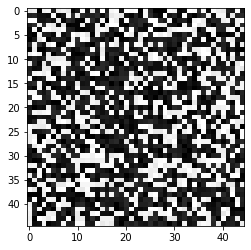

In [ ]:
plt.figure()
plt.imshow(img,cmap='gray')

In [ ]:
ldf = len(df)
ldf

3000

In [ ]:
import numpy as np
import os

In [ ]:
path = !pwd
path = path[0]
path

'/home/z3/courses/Dissertation/ml'

In [ ]:
class_count = np.zeros(4)
for i in range(ldf):
    txt = df.iloc[i]['text']
    clabel = df.iloc[i]['class']
    s = []
    for i in txt:
        s.append(str(ord(i)))
    for i in range(25):
        s.append('255')
    s = " ".join(s)
    s = s+" "
    class_count[int(clabel)]+=1
    fname = str(clabel)+"_"+str(int(class_count[int(clabel)]))+".pgm"
    f = open(path+'/allrounds_pgm/'+fname,"w")
    f.write("P2 45 45 255\n")
    f.write(s)
    f.close()
    os.system("pnmtopng -compression 0 "+path+'/allrounds_pgm/'+fname+" > "+path+'/allrounds_png/'+fname[:-3]+"png")

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found


In [ ]:
import random

In [ ]:
temp = [random.randint(1,200) for i in range(10)]

In [ ]:
for i in range(11):
    for j in temp:
        os.system("cp allrounds2200png/"+str(i)+"_"+str(j)+".png b")

In [ ]:
temp

[11, 165, 115, 199, 4, 99, 10, 92, 22, 48]

In [ ]:
%cd b

/home/z3/courses/Dissertation/ml/b


In [ ]:
l = os.listdir(os.curdir)

In [ ]:
imgd = {}
for i in l:
    imgd[i] = imread(i)

In [ ]:
imgs = {}

In [ ]:
for i in temp:
    imgs[i] = []

In [ ]:
for i in range(11):
    for j in temp:
        imgs[j].append(imgd[str(i)+"_"+str(j)+".png"])

TypeError: Invalid shape () for image data

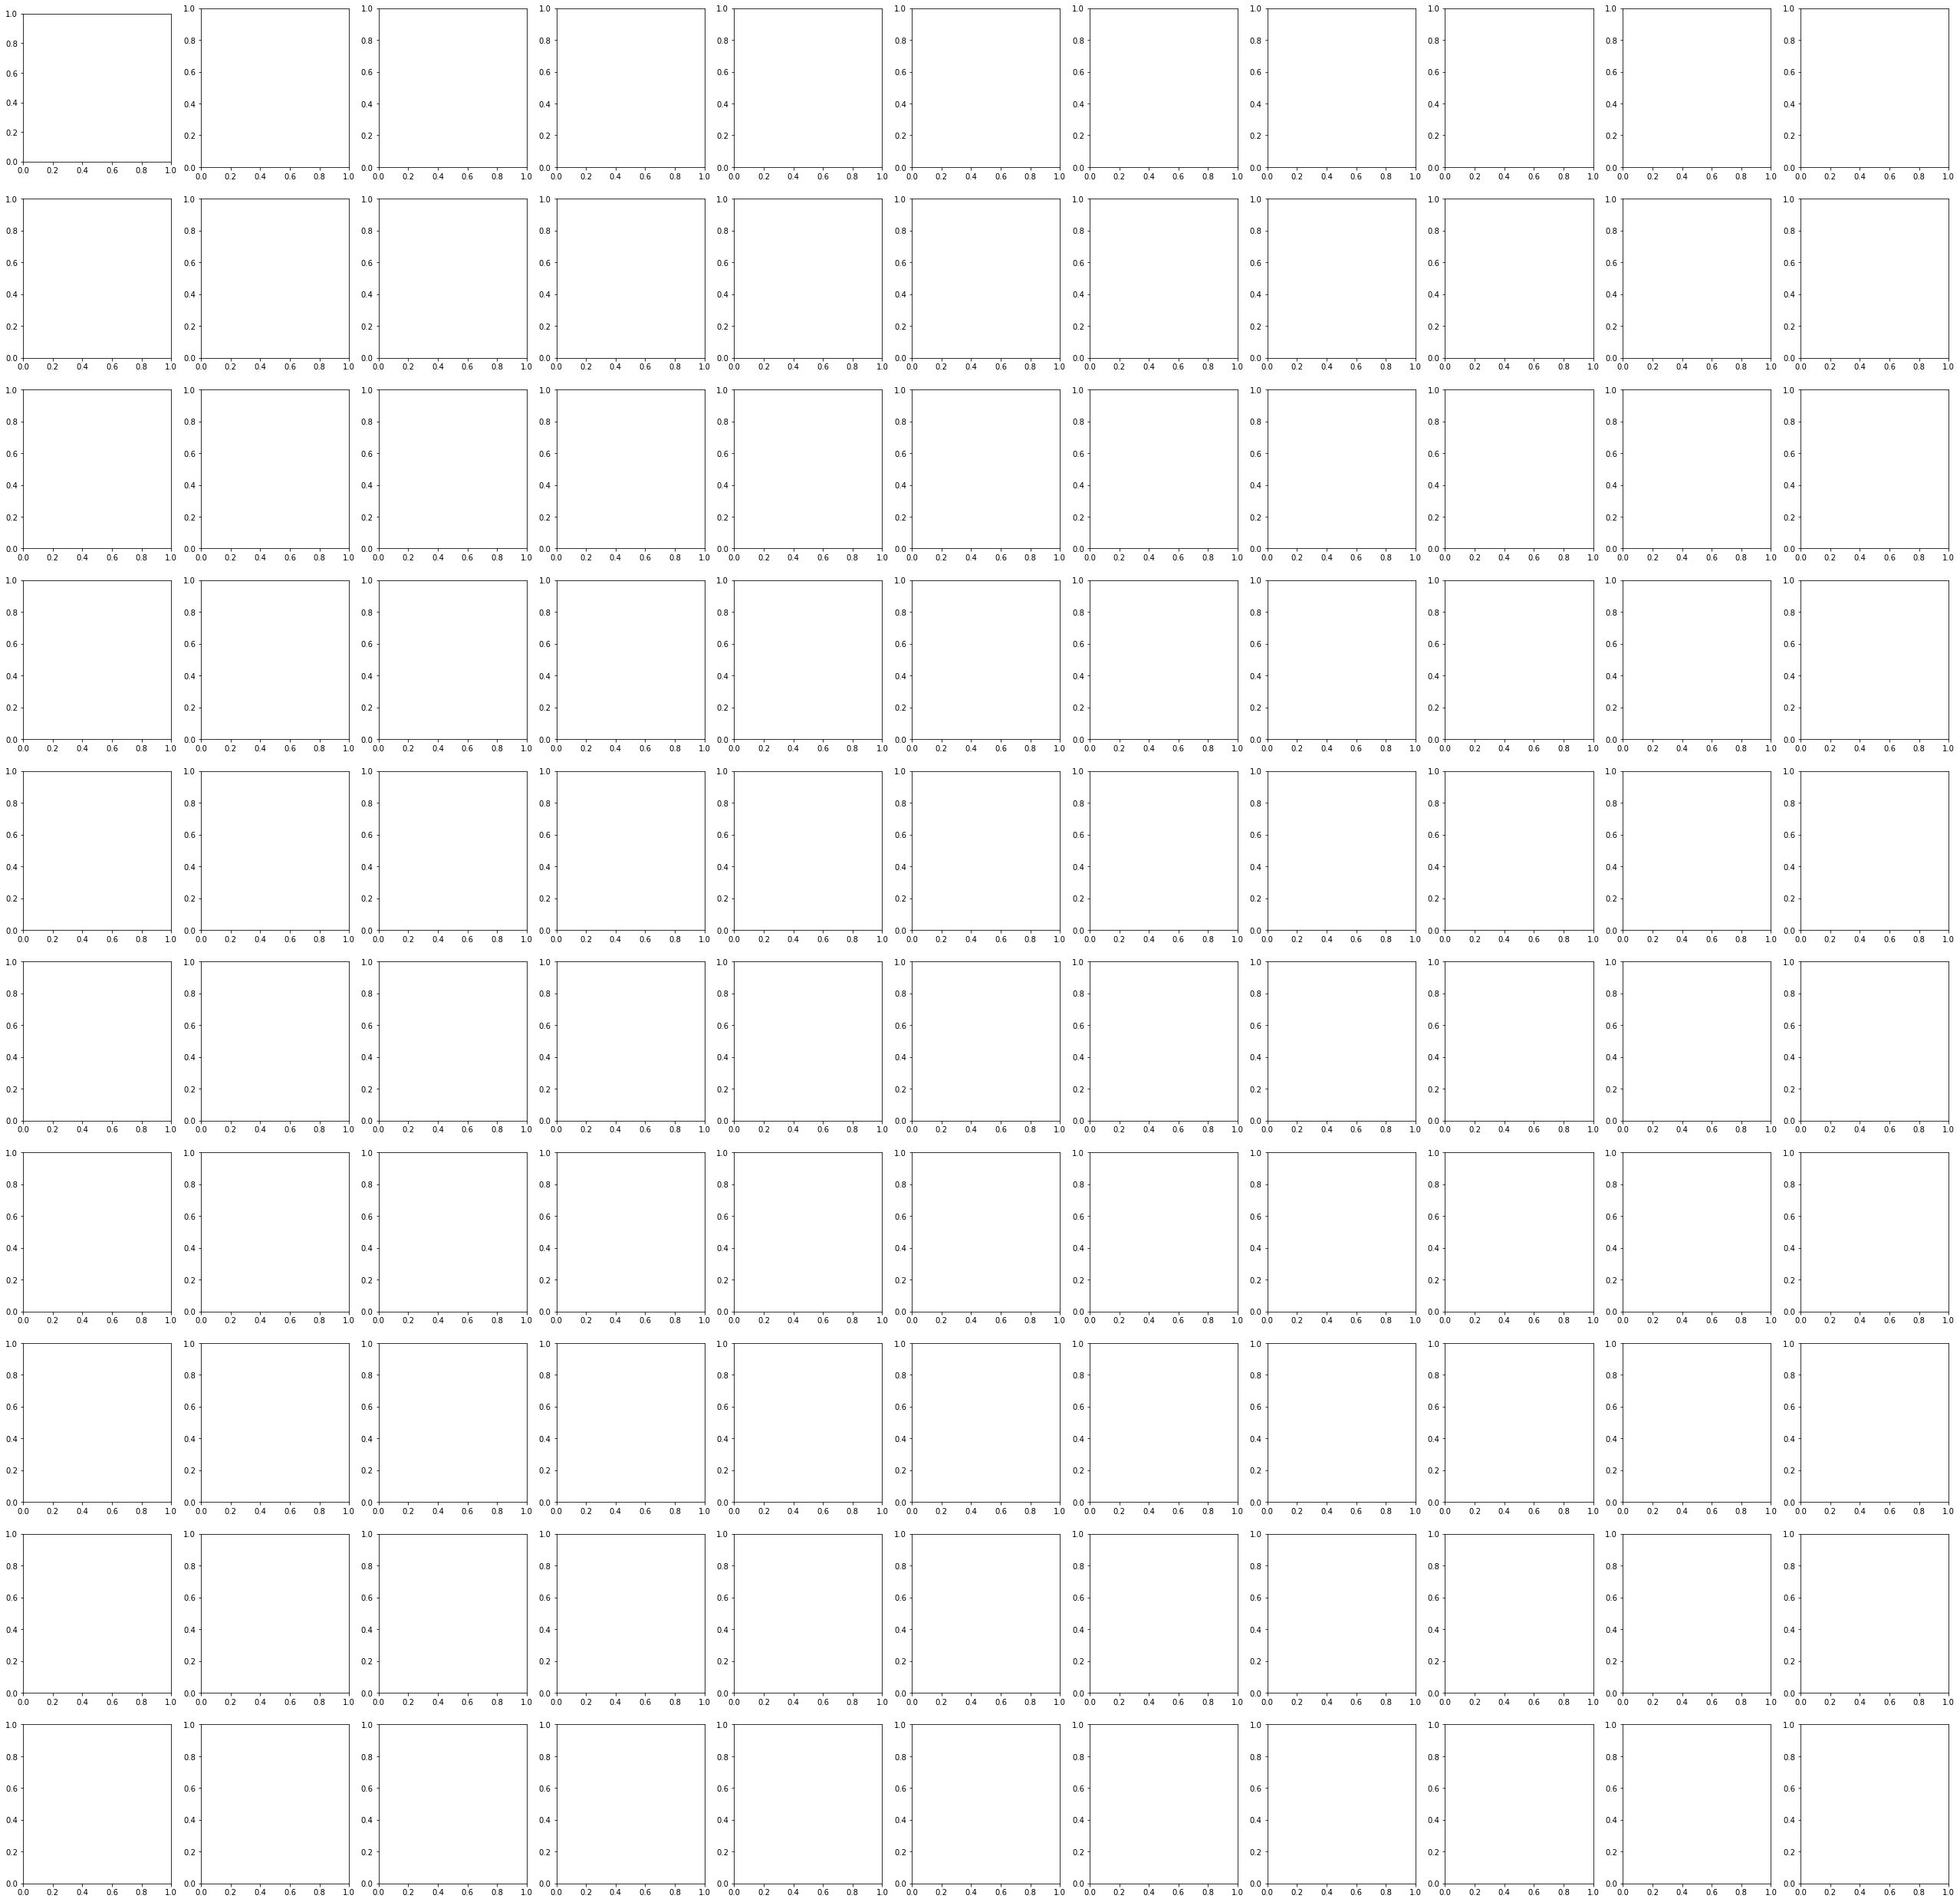

In [ ]:
# _, axs = plt.subplots(n_row, n_col, figsize=(12, 12))
_, axs = plt.subplots(len(temp), 11, figsize=(45, 45))
axs = axs.flatten()
for img, ax in zip(imgs, axs):
    ax.imshow(img)
plt.show()


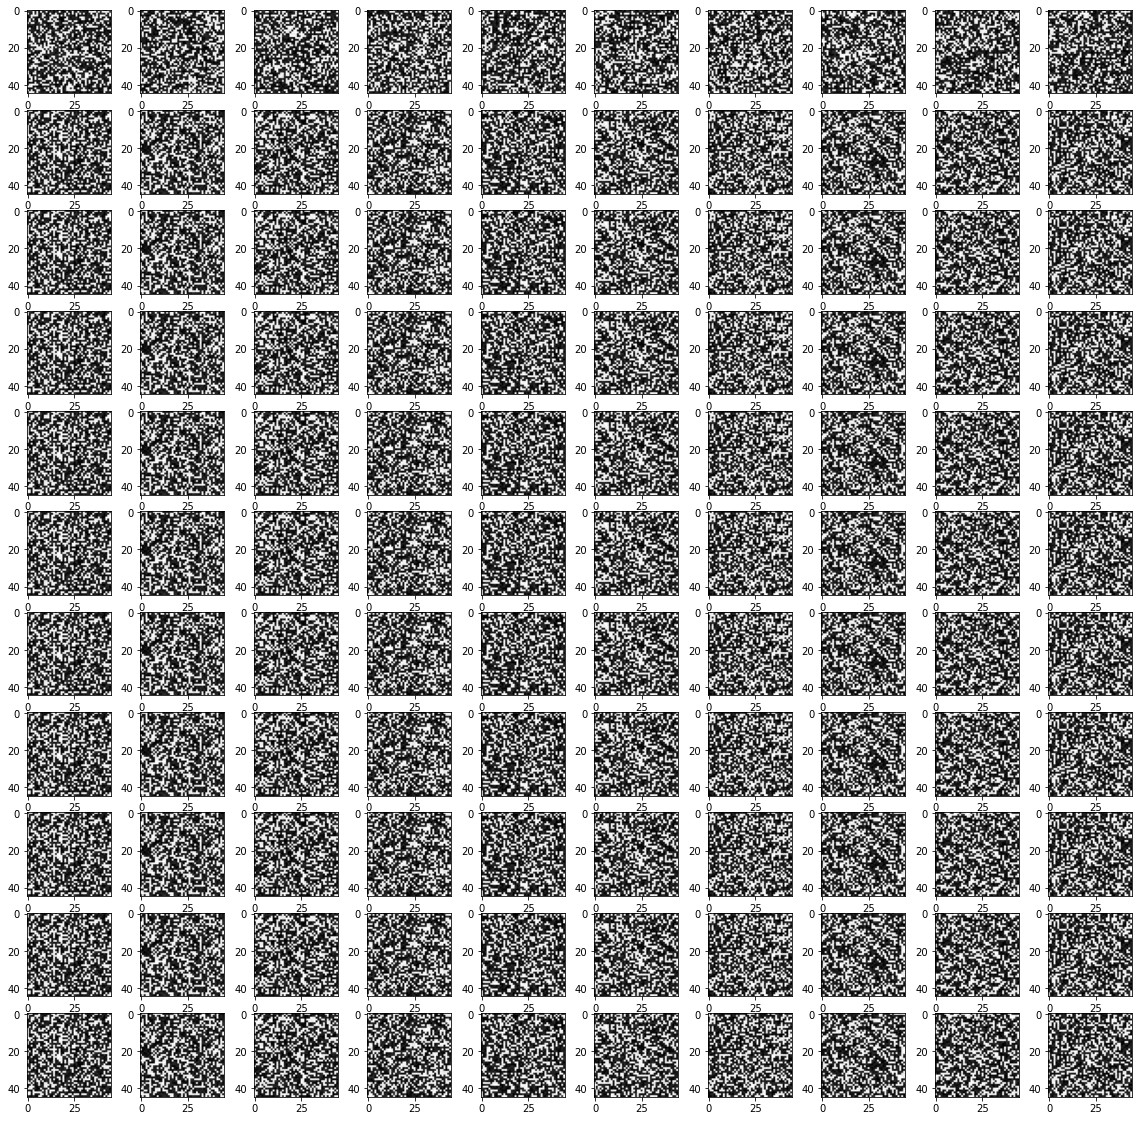

In [ ]:
count=1
fig = plt.figure(figsize=(20,20))
for i in range(11):
    for j in temp:
        fig.add_subplot(11,10,count).imshow(imgd[str(i)+"_"+str(j)+".png"],cmap='gray')
        count+=1

In [ ]:
#column corresponds to a particular ciphertext
#rows correspond to different rounds